# Data

Exploratory Data Analysis is very useful to understand what you are dealing with. This makes sure that you understand any inherent bias of the data, and you can hypothesize on the more appropriate models to be used.


## What is Dementia?

Dementia is a desease that affects the older age folks, and they start having impairment in their daily life. 

<br>

![](../imgs/dementia.jpg)


<br><br>

## Load Data

One of the more sensitive and necessary processes to build machine learning models is simply 

In [1]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adni = pd.read_csv("data/ADNIMERGE.csv")
display(adni)
set(adni['DX'])

/tmp/ipykernel_15734/292230101.py:1: DtypeWarning: Columns (18,19,20,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  adni = pd.read_csv("data/ADNIMERGE.csv")


,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-06 04:52:41.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-06 04:52:41.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6.0,2021-02-06 04:52:41.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12.0,2021-02-06 04:52:41.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24.0,2021-02-06 04:52:41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,6063,114_S_6063,m36,114,ADNI3,ADNI3,2021-02-22,SMC,74.0,Female,...,NaN,NaN,NaN,NaN,1.1789,3.006160,36.00000,36,36.0,2021-02-27 04:52:50.0
15167,6899,305_S_6899,bl,305,ADNI3,ADNI3,2021-02-24,NaN,55.4,Female,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-27 04:52:51.0
15168,5278,082_S_5278,m72,82,ADNI3,ADNI2,2020-03-05,SMC,80.2,Male,...,347.8,31.48,1.22315,NaN,1.2446,6.499660,77.83610,78,72.0,2021-03-02 04:53:18.0
15169,6157,305_S_6157,m36,305,ADNI3,ADNI3,2021-03-01,CN,67.8,Female,...,NaN,NaN,NaN,NaN,1.0569,3.022590,36.19670,36,36.0,2021-03-02 04:53:19.0


{'CN', 'Dementia', 'MCI', nan}

<Axes: ylabel='RID'>

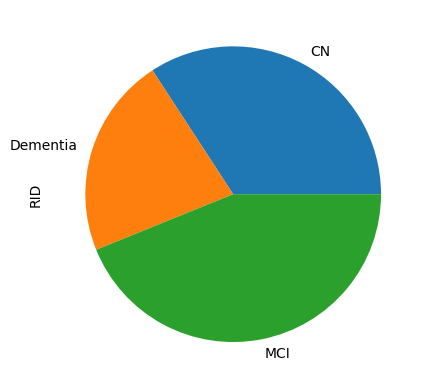

In [3]:
adni.groupby('DX').count()['RID'].plot.pie()

<br><br>

## Group columns

There is generally a sense of how much certain aspects impact the patient's path. There is quite some information that is complementary - either in the biological sense or in the psychological sense. 

In [4]:
groups = {
    "demographic": [
        "AGE", "PTGENDER", "PTEDUCAT", "PTETHCAT", "PTRACCAT", "PTMARRY", "APOE4"
    ],
    "clinical_cognitive": [
        "MMSE", "CDRSB", "ADAS11", "ADAS13", "ADASQ4",
        "FAQ", "MOCA", "TRABSCOR", "LDELTOTAL", "DIGITSCOR"
    ],
    "neuropsychological_pt": [
        "EcogPtMem", "EcogPtLang", "EcogPtOrgan", "EcogPtPlan",
        "EcogPtDivatt", "EcogPtVisspat", "EcogPtTotal"
    ],
    "neuropsychological_sp": [
        "EcogSPMem", "EcogSPLang", "EcogSPOrgan", "EcogSPPlan",
        "EcogSPDivatt", "EcogSPVisspat", "EcogSPTotal"
    ],
    "mri_volumetric": [
        "Hippocampus", "Entorhinal", "Fusiform", "MidTemp", "Ventricles",
        "WholeBrain", "ICV"
    ],
    "biomarkers_csf_pet": [
        "ABETA", "TAU", "PTAU", "FDG", "AV45", "PIB"
    ],
    "diagnostic": ["DX", "DX_bl"],
    "meta": ["RID", "PTID", "VISCODE", "EXAMDATE", "Years_bl", "update_stamp"]
}

important_cols = [
    "AGE", "PTGENDER", "PTEDUCAT", "MMSE", "CDRSB", "ADAS13",
    "Hippocampus", "Ventricles", "WholeBrain", "Entorhinal",
    "ABETA", "TAU", "PTAU"
]

for name, cols in groups.items():
    groups[name] = [c for c in cols if c in adni.columns]

<br><br>

## Missingness

It is always important to understand what is the level of the missing attribute-per-row. This gives insight also in the processes of collecting these data - because generally the biological testing happens together or the neurological one.

/tmp/ipykernel_15734/3703769289.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x="Mean Missing Fraction", y="Group", palette="mako")


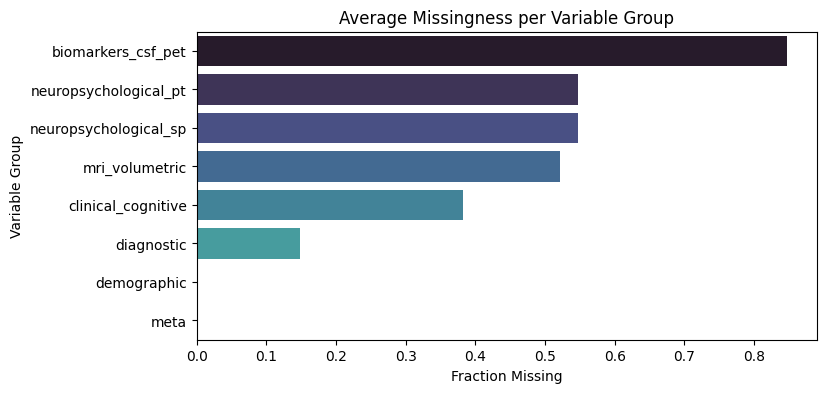

In [5]:
group_missing = {
    name: adni[cols].isna().mean().mean() if cols else np.nan
    for name, cols in groups.items()
}

missing_df = pd.DataFrame(list(group_missing.items()), columns=["Group", "Mean Missing Fraction"])
missing_df = missing_df.sort_values("Mean Missing Fraction", ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=missing_df, x="Mean Missing Fraction", y="Group", palette="mako")
plt.title("Average Missingness per Variable Group")
plt.xlabel("Fraction Missing")
plt.ylabel("Variable Group")
plt.show()


<Figure size 1000x400 with 0 Axes>

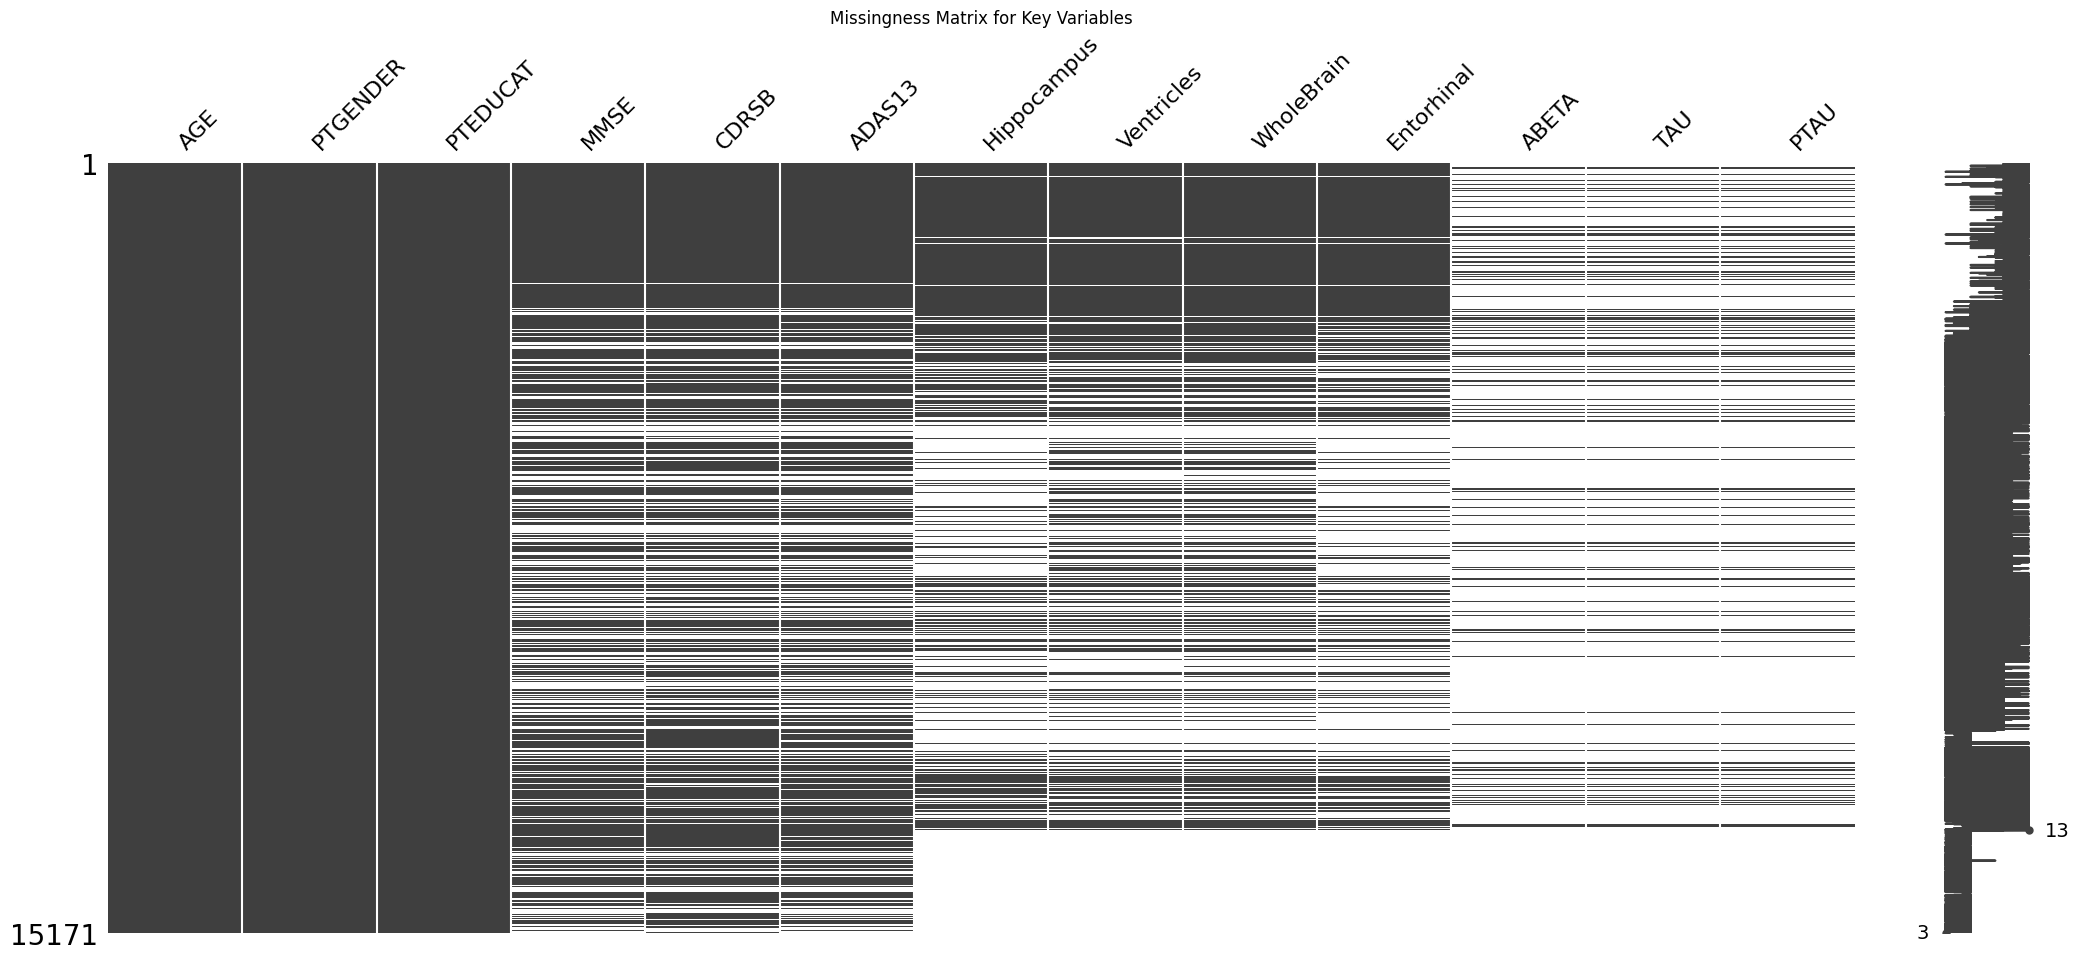

In [6]:
plt.figure(figsize=(10,4))
msno.matrix(adni[important_cols])
plt.title("Missingness Matrix for Key Variables")
plt.show()

<br><br>

## Explore combinations
It always makes sense to explore some of the variables to see if they make sense for the model, or if there are some extremities which impact the general distribution. 

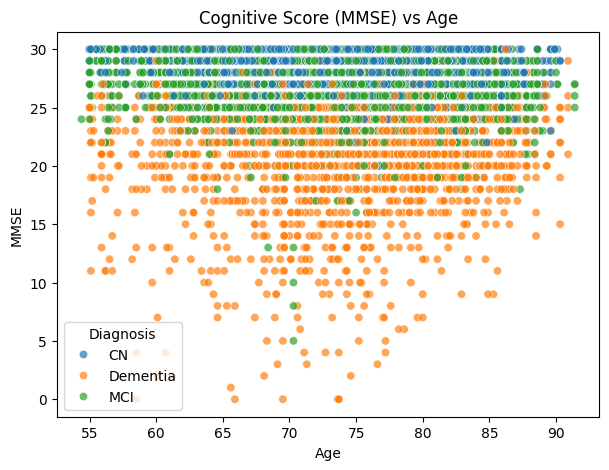

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=adni, x="AGE", y="MMSE", hue="DX", alpha=0.7)
plt.title("Cognitive Score (MMSE) vs Age")
plt.xlabel("Age")
plt.ylabel("MMSE")
plt.legend(title="Diagnosis", loc="lower left")
plt.show()


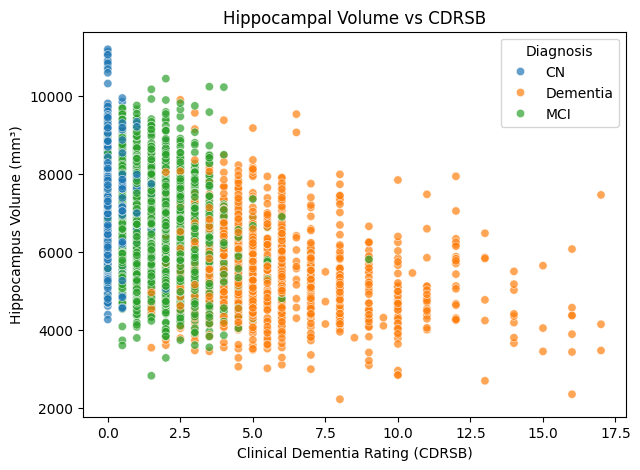

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=adni, x="CDRSB", y="Hippocampus", hue="DX", alpha=0.7)
plt.title("Hippocampal Volume vs CDRSB")
plt.xlabel("Clinical Dementia Rating (CDRSB)")
plt.ylabel("Hippocampus Volume (mm³)")
plt.legend(title="Diagnosis")
plt.show()
